# ObsID : 0945020133, SRCNUM : 3, Instru : EMOS2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob

import stingray as st
from stingray import Lightcurve, AveragedPowerspectrum

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [10,5]

In [2]:
def lightcurve(file):
    hdul = fits.open(file)
    print()
    print(color.BOLD +file+ color.END)
    hdul.info()
    
    rate_data = hdul[1].columns
    print()
    print(rate_data)
        
    time = hdul[1].data.field('TIME')
    rate = hdul[1].data.field('RATE')
    error = hdul[1].data.field('ERROR')
    backrate = hdul[1].data.field('BACKV')
    
    """
    print()
    print(f"TIME = {time} s")
    print(f"RATE = {rate} count/s")
    print(f"ERROR = {error} count/s")
    """
    
    lcs = []
    backlcs = []
    gtis = []
    for i in hdul[2].data:
        gtis.append([i[0],i[1]])
    lcs.append(Lightcurve(time, rate, error, gti=gtis, input_counts=False))
    backlcs.append(Lightcurve(time, backrate, error, gti=gtis, input_counts=False))
    
    for i in range(len(lcs)):
        plt.xlabel('Time (s)')
        plt.ylabel('Countrate (/s)')
        plt.plot(lcs[i].time, lcs[i].countrate, color='steelblue', lw=1, ds='steps-mid', label='Source corr')
        plt.plot(backlcs[i].time, backlcs[i].countrate, color='firebrick',lw=1, ls='--', ds='steps-mid', label='Background')
        plt.title(f'{file}')
        plt.legend(loc='upper right')
        plt.grid()
        for j in range(len(lcs[i].gti)-1):
            plt.axvspan(lcs[i].gti[j][1],lcs[i].gti[j+1][0],color='purple',alpha=0.25)
        plt.show()

## Time bin size = 10s


ObsID0945020133_SRCNUM3_EMOS2_t10_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS2_t10_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     79   1575R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   2R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   2R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


/home/celia/.local/lib/python3.10/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")
/home/celia/.local/lib/python3.10/site-packages/stingray/lightcurve.py:520: UserWarning: There are non-finite points in the data, but they are outside GTIs. 
  warnings.warn("There are non-finite points in the data, but they are outside GTIs. ")
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)


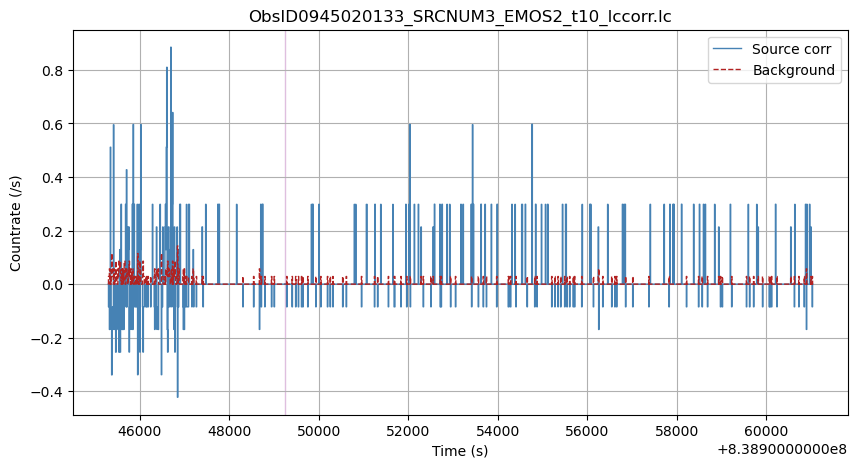

In [3]:
lightcurve(glob.glob('ObsID*_SRCNUM*_E*_t10_lccorr.lc')[0])

## Time bin size = 50s


ObsID0945020133_SRCNUM3_EMOS2_t50_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS2_t50_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     79   32R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


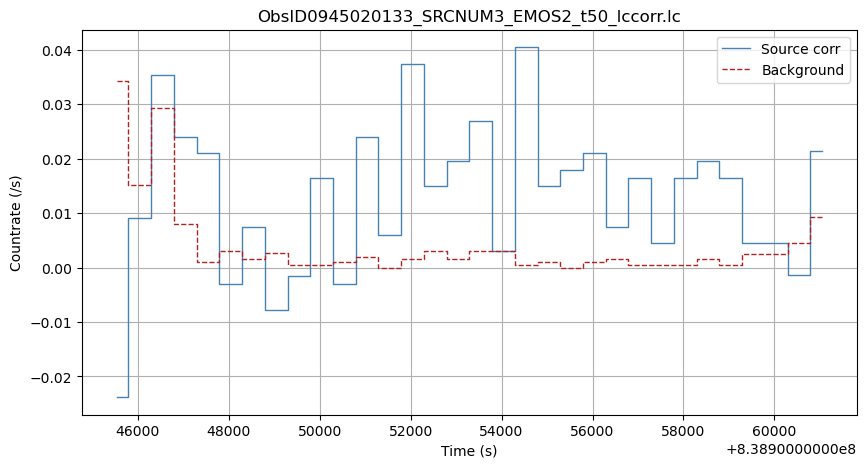

In [4]:
lightcurve(glob.glob('ObsID*_SRCNUM*_E*_t50_lccorr.lc')[0])

## Time bin size = 200s


ObsID0945020133_SRCNUM3_EMOS2_t200_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS2_t200_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     79   32R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


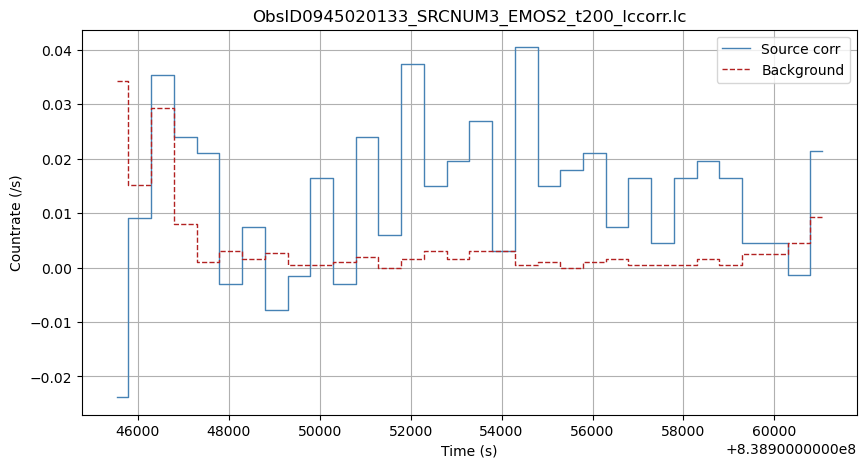

In [5]:
lightcurve(glob.glob('ObsID*_SRCNUM*_E*_t200_lccorr.lc')[0])

## Time bin size = 500s


ObsID0945020133_SRCNUM3_EMOS2_t500_lccorr.lc
Filename: ObsID0945020133_SRCNUM3_EMOS2_t500_lccorr.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     79   32R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   1R x 2C   [D, D]   
  4  REG00105      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)


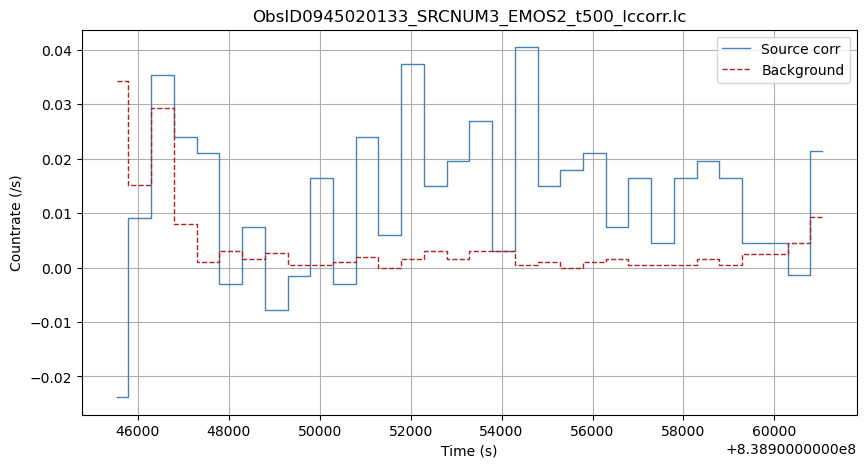

In [6]:
lightcurve(glob.glob('ObsID*_SRCNUM*_E*_t500_lccorr.lc')[0])